<a href="https://colab.research.google.com/github/basthep/house-price-prediction/blob/main/internship_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 5 folds for each of 39 candidates, totalling 195 fits
Best degree of polynomial features: 1
Best alpha (regularization strength): 1e-06
Mean Squared Error (MSE): 0.5558915986583839
Mean Absolute Error (MAE): 0.5332001304884977
R-squared: 0.5757877060605798


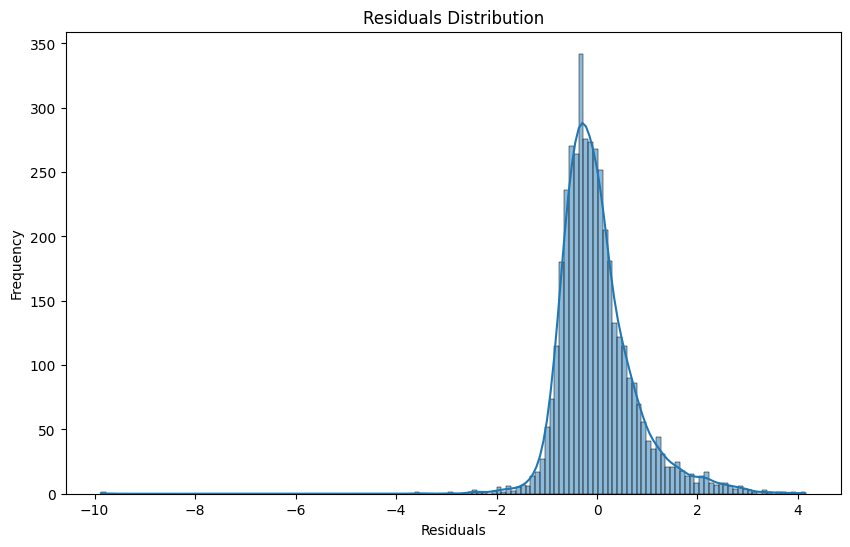

Predictions on new data:
Sample 1: Predicted House Price = 4.43
Sample 2: Predicted House Price = 1.90
Sample 3: Predicted House Price = 1.35
Sample 4: Predicted House Price = 1.56
Sample 5: Predicted House Price = 1.34


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 1. Load the California Housing Dataset
housing = fetch_california_housing()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target (house prices) to the DataFrame
df['MEDV'] = housing.target  # 'MEDV' represents house prices (target)

# 2. Preprocessing: Handle missing values
df = df.dropna()  # Remove rows with missing values for simplicity

# List of feature columns (excluding 'MEDV' which is the target)
feature_columns = df.columns[df.columns != 'MEDV']

# 3. Split the dataset into training and testing sets
X = df[feature_columns].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create a pipeline with polynomial features and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures()),  # Polynomial feature transformation
    ('ridge', Ridge())  # Ridge regression model
])

# 5. Define hyperparameters to search
param_grid = {
    'poly__degree': [1, 2, 3],  # Polynomial degree (1 is linear, 2 is quadratic, etc.)
    'ridge__alpha': np.logspace(-6, 6, 13),  # Regularization strength
}

# 6. Apply GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 7. Get the best hyperparameters from GridSearchCV
best_degree = grid_search.best_params_['poly__degree']
best_alpha = grid_search.best_params_['ridge__alpha']
print(f"Best degree of polynomial features: {best_degree}")
print(f"Best alpha (regularization strength): {best_alpha}")

# 8. Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

# 9. Plotting the Results
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 10. Prediction on New Data
# Let's create some new data for prediction (example: 5 samples)
new_data = np.array([
    [8.4, 41.0, 6.98, 1.09, 0.59, 2.02, 37.5, -122.3],  # 1st new sample
    [2.1, 25.0, 4.02, 1.2, 0.1, 1.28, 34.0, -118.9],   # 2nd new sample
    [3.8, 18.0, 5.5, 0.8, 0.3, 1.7, 40.0, -123.0],     # 3rd new sample
    [1.3, 33.0, 3.0, 0.6, 0.2, 1.4, 36.0, -121.5],     # 4th new sample
    [4.5, 36.0, 7.2, 0.9, 0.4, 1.5, 38.0, -120.2]      # 5th new sample
])

# Predict house prices on new data
new_predictions = best_model.predict(new_data)

# Print predictions
print("Predictions on new data:")
for i, pred in enumerate(new_predictions):
    print(f"Sample {i+1}: Predicted House Price = {pred:.2f}")


In [ ]:
Machine Learning Model Documentation: House Price Prediction
This documentation outlines the architecture, training process, and usage instructions for a machine learning model that predicts house prices based on various features. The model is built using Ridge Regression with polynomial feature transformations and fine-tuned using GridSearchCV to optimize the hyperparameters.

1. Model Architecture
1.1 Data Preprocessing
The input dataset consists of various features that describe the housing market, such as:

Features: Various columns representing factors like the number of rooms, median income, proximity to schools, and geographical details (latitude, longitude).
Target Variable: The house price (MEDV) which is the variable to be predicted.
Preprocessing steps:

Handling Missing Data: Rows with missing values are removed to ensure a clean dataset.
Feature Scaling: We apply StandardScaler to normalize the data. This ensures that the features are scaled to have a mean of 0 and a standard deviation of 1.
1.2 Model Pipeline
The model is constructed using a pipeline that consists of three main components:

Feature Scaling (StandardScaler):

Scales the features to normalize them for better model performance.
Polynomial Feature Transformation (PolynomialFeatures):

Introduces polynomial features to capture non-linear relationships between the features and the target variable. This allows the model to model more complex relationships.
Ridge Regression (Ridge):

This is the regression model used to predict the house prices.
Ridge Regression includes L2 regularization to penalize large coefficients and prevent overfitting.
1.3 Hyperparameters Tuned
The following hyperparameters are optimized using GridSearchCV:

Polynomial Features Degree (poly__degree):
Controls the degree of the polynomial transformation applied to the features. A degree of 1 represents linear regression, while higher values introduce more complex (non-linear) relationships.
Regularization Strength (ridge__alpha):
The regularization parameter for Ridge regression. It controls the strength of the penalty for large coefficients, preventing overfitting. A lower alpha allows the model to fit the data more closely, while a higher alpha reduces the complexity of the model.
Model Training Process:

GridSearchCV is used to search for the optimal combination of poly__degree and ridge__alpha by performing 5-fold cross-validation.
Cross-Validation helps assess the model's performance by splitting the dataset into 5 parts, training on 4, and testing on the 1 left out. This process is repeated to ensure the model generalizes well to unseen data.
2. Model Training Process
The training process is executed as follows:

Dataset Loading:

The California Housing dataset is loaded using fetch_california_housing() from Scikit-learn.
Data Preprocessing:

Missing Values: The dataset is cleaned by removing rows with missing values.
Feature Selection: We use all the columns except the target variable MEDV for training.
Splitting Data:

The dataset is split into training and test sets (80% training, 20% testing) using train_test_split().
Model Pipeline Creation:

The pipeline is defined, containing the StandardScaler, PolynomialFeatures, and Ridge regression model.
Grid Search:

GridSearchCV performs hyperparameter tuning, testing various combinations of polynomial degrees and regularization strengths, aiming to minimize Mean Squared Error (MSE).
Model Fitting:

The best hyperparameters are selected, and the model is trained on the full training data.
Model Evaluation:

The model's performance is evaluated on the test set using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared.
3. Model Evaluation
After training the model, the following evaluation metrics are computed:

Mean Squared Error (MSE):

This metric measures the average squared difference between the predicted and actual values. A lower MSE indicates better model performance.
Mean Absolute Error (MAE):

MAE calculates the average of the absolute differences between predicted and actual values, providing an interpretable measure of error.
R-squared (R²):

R-squared indicates the proportion of the variance in the target variable (house prices) explained by the model. An R² value closer to 1 indicates better performance.

4. Usage Instructions
4.1 Predict on New Data
Prepare New Data:

Your new data should have the same features as the training data. It should be a 2D array where each row represents a sample and each column represents a feature.
Make Predictions:

Use the trained model to predict the house prices for the new data using the predict() method.
4.2 Evaluation of Predictions:
Once predictions are made, you can compare the predicted values with the actual values (if available) and evaluate the model's performance using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared.

4.4 Visualizing Model Residuals:
To inspect the quality of the predictions visually, you can plot the residuals (difference between actual and predicted values)